# A Notebook for Segmenting Images and Edge Detection
This notebook allows you to segment images and extract edges from images using a technique called Canny edge detection.

The notebook uses the [numpy](http://numpy.org) library to manage data and the [matplotlib](https://matplotlib.org) library to visualize the results, and an image processing library called [scikit-image](http://scikit-image.org).

The following cell contains some predefined functions to implement [watershed segmentation](https://en.wikipedia.org/wiki/Watershed_(image_processing) and [Canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector). Please make sure you have run this cell before you run other cells in this notebook.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature,io,color
from skimage.morphology import watershed
from skimage.filters import threshold_otsu,threshold_yen

def loadIMG():
    filename=input("Please input the image filename:")
    sigma=float(input('Please input the sigma for edge detection: '))
    img = io.imread(filename)
    #if len(img.shape)!=2:
    #    img = color.rgb2gray(img)
    return img,sigma

def CannyEdge(img,sigma=0.5):
    if len(img.shape)!=2:
        img = color.rgb2gray(img)
    edges = feature.canny(img, sigma)
    return edges

def displayCannyEdge(img,sigma=0.5):
    plt.clf()
    edges1 = CannyEdge(img,sigma)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(edges1, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Canny Edge Image', fontsize=10)
    #plt.savefig('Edge Detection.png',dpi=300) 
    plt.show() 

def Segment(img):
    if len(img.shape)!=2:
        img = color.rgb2gray(img)
    #thresh = threshold_otsu(img)
    thresh = threshold_yen(img)
    segmentation = img > thresh
    
    #if len(img.shape)>2:
    #    img = color.rgb2gray(img)
    #markers = np.zeros_like(img)
    #markers[img < 0.5] = False
    #markers[img > 0.6] = True
    #segmentation = watershed(img, markers)
    #print(segmentation)
    return segmentation

def displaySegment(img):
    plt.clf()
    segmentation=Segment(img)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(segmentation, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    fig.tight_layout()
    plt.show() 

## Segment an Image
Run the following cell and input the filename of an image that you want to process. It will ask you the parameter sigma for Canny edge detection. However, you won't need to use sigma in the following cell.

Please input the image filename:./Image processing/longjump.jpg
Please input the sigma for edge detection: 0.5


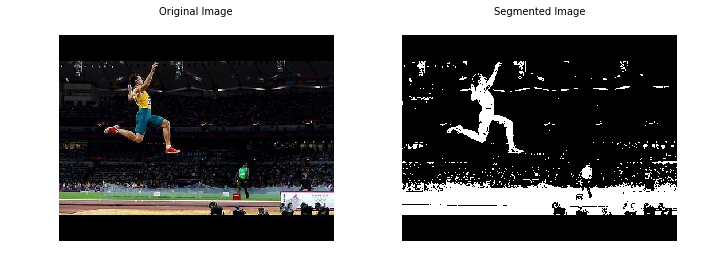

In [5]:
img,sigma=loadIMG()
displaySegment(img)

## Edge Detection
The following cell will detect the edges of the given image. You can use images provided in the repository or your own images. You will be asked to input sigma (standard deviation for the Gaussian filter in Canny edge detection). Please input one sigma value. Sigma value can be any real numbers but normally they'd better range from 0 to 3.

Please input the image filename:./Image processing/longjump.jpg
Please input the sigma for edge detection: 0.5


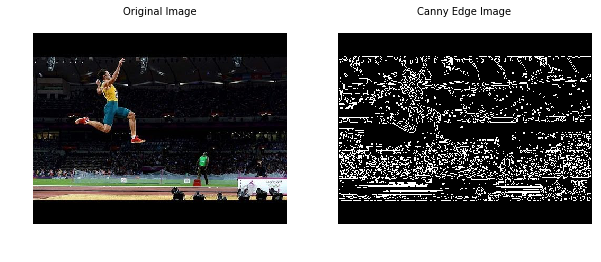

In [10]:
img,sigma=loadIMG()
displayCannyEdge(img)

## Combining Segmenting and Edge Detection
The cell below defines a function to segment an image and then detect its edges. It will output the original image, the image with edge detection, and the image after segmenting and then detecting its edges.  

Tips: if you cannot see the picture very clearly, it has been saved at the same folder of this notebook.

In [86]:
def displaySegmentThenCanny(img,sigma=0.5):
    plt.clf()
    segmentation=Segment(img)
    edges=CannyEdge(segmentation,sigma)
    fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(segmentation, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    ax3.imshow(edges, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Segmented then Edged Image', fontsize=10)
    fig.tight_layout()
    plt.savefig('Segmenting and Edge Detection.png',dpi=300) 
    plt.show() 

Running the following cell will execute that function with the image you choose.

Please input the image filename:./Image processing/longjump.jpg
Please input the sigma for edge detection: 0.4


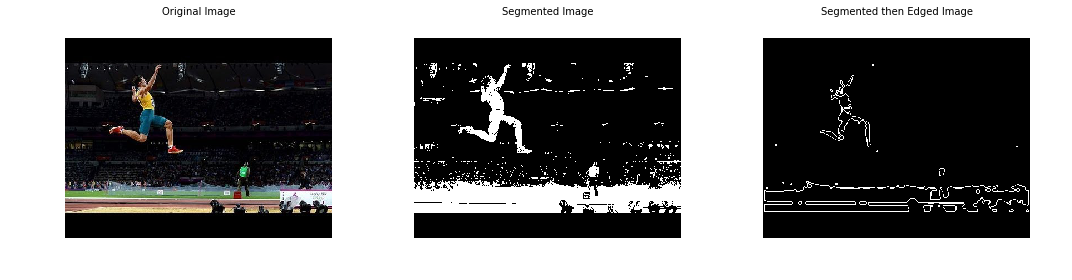

In [88]:
img,sigma=loadIMG()
displaySegmentThenCanny(img,sigma)